In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [3]:
#Convolutional and pooling layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [4]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

In [5]:
from tensorflow.keras.preprocessing import image 
import numpy as np
import pandas as pd



In [6]:
fashion_mnist_data=tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist_data.load_data()

In [7]:
model=Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=[acc,mae])

In [10]:
train_images.shape

(60000, 28, 28)

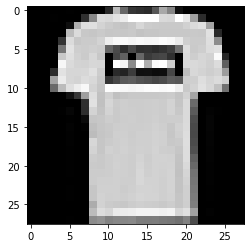

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[1],cmap='gray',interpolation='nearest')
plt.show()

9


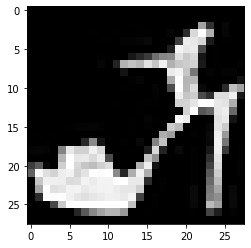

In [12]:
labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels[0])
plt.imshow(train_images[9],cmap='gray',interpolation='nearest')
plt.show()

In [13]:
#Rescale the image vaules so that they lei in between 0 and 1
train_images=train_images/256
test_images=test_images/256

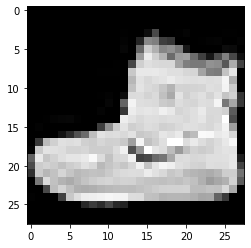

Label:  Ankle boot


In [14]:
i=0
img=train_images[i,:,:]
plt.imshow(img,cmap='gray')
plt.show()
print('Label: ', labels[train_labels[i]])

In [15]:
history=model.fit(train_images[...,np.newaxis], train_labels, epochs=19, batch_size=256,verbose=2 )

Epoch 1/19
235/235 - 1s - loss: 0.5561 - sparse_categorical_accuracy: 0.8051 - mean_absolute_error: 4.4200
Epoch 2/19
235/235 - 1s - loss: 0.3680 - sparse_categorical_accuracy: 0.8698 - mean_absolute_error: 4.4200
Epoch 3/19
235/235 - 1s - loss: 0.3373 - sparse_categorical_accuracy: 0.8814 - mean_absolute_error: 4.4200
Epoch 4/19
235/235 - 1s - loss: 0.3185 - sparse_categorical_accuracy: 0.8863 - mean_absolute_error: 4.4200
Epoch 5/19
235/235 - 1s - loss: 0.3073 - sparse_categorical_accuracy: 0.8898 - mean_absolute_error: 4.4200
Epoch 6/19
235/235 - 1s - loss: 0.2961 - sparse_categorical_accuracy: 0.8937 - mean_absolute_error: 4.4200
Epoch 7/19
235/235 - 1s - loss: 0.2871 - sparse_categorical_accuracy: 0.8964 - mean_absolute_error: 4.4200
Epoch 8/19
235/235 - 1s - loss: 0.2808 - sparse_categorical_accuracy: 0.8987 - mean_absolute_error: 4.4200
Epoch 9/19
235/235 - 1s - loss: 0.2764 - sparse_categorical_accuracy: 0.9000 - mean_absolute_error: 4.4200
Epoch 10/19
235/235 - 1s - loss: 0.27

In [16]:
#Load the history into a pandas DataFrame
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.556088,0.805133,4.420001
1,0.367983,0.869800,4.419999
2,0.337269,0.881433,4.420000
3,0.318452,0.886317,4.420000
4,0.307271,0.889767,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

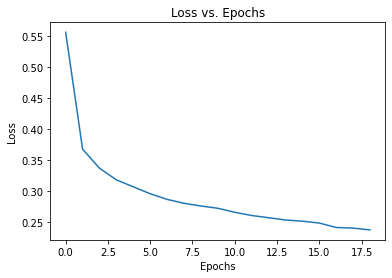

In [17]:
#Make a plot for the loss
loss_plot=df.plot(y="loss",title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [20]:
test_loss, test_accuracy, test_mae=model.evaluate(test_images[...,np.newaxis],test_labels, verbose=2)

313/313 - 1s - loss: 0.3062 - sparse_categorical_accuracy: 0.8935 - mean_absolute_error: 4.4200


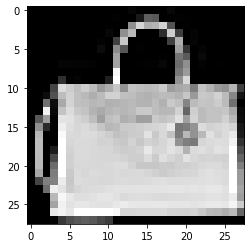

Label:  Bag


In [21]:
inx=30
test_image=test_images[inx]
plt.imshow(test_image,cmap='gray')
plt.show()
print("Label: ", labels[test_labels[inx]])

In [24]:
predictions=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model_prediction: {labels[np.argmax(predictions)]}")

Model_prediction: Bag
